In [5]:
pip install seaborn


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------------ --------------------------- 3.7/11.5 MB 18.1 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.5 MB 20.1 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 19.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Setup the environment

In [19]:
import pandas as pd

# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset into Pandas

In [8]:
df = pd.read_csv('C:/Users/diego/Documents/Proyectos de datos/Datos/Fraud.csv')

# Display the first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info() # 6362620 rows, 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Explore and clean the data

In [9]:
# Check for missing values in columns
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Correlation matrix
We want to select the Numerical Columns because for the correlation matrix only we can use float variables.

In [13]:
# Select only the numerical columns
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
df_numerical = df[numerical_columns]

<Axes: >

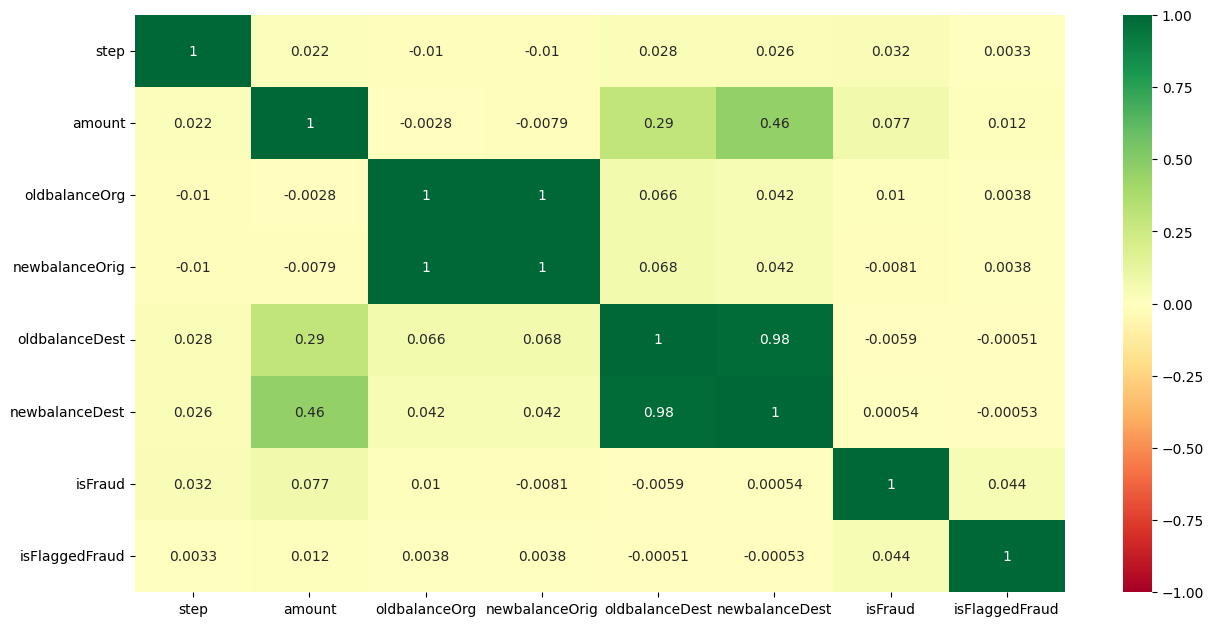

In [14]:
plt.figure(figsize=(15,7.5))
sns.heatmap(df_numerical.corr(), annot=True, vmin=-1, vmax=+1, cmap='RdYlGn')

We can see how it is logical

- High Correlation Between oldbalanceOrg and newbalanceOrig.

- High Correlation Between oldbalanceDest and newbalanceDest.

- Weak Correlation with isFraud:

The correlations between isFraud and other numerical variables are generally weak: The highest correlation with isFraud is 0.077 with amount, suggesting a very weak relationship between transaction amounts and fraudulent behavior. Other features like oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest have correlations near zero, indicating little to no linear relationship with fraud.

This means that none of the features in their current form have a strong linear correlation with whether a transaction is fraudulent. However, this doesn't necessarily mean they aren't useful for predicting fraud — non-linear relationships might exist that can still be captured by machine learning models.

Weak Correlation with Fraud: The weak correlations with isFraud suggest that there might be more complex, non-linear relationships in the data that a simple correlation matrix can't capture. We'll likely need more advanced machine learning techniques to detect fraud effectively.

Balance Features: Since the old and new balances are highly correlated, we might consider focusing on derived features like the difference between old and new balances for both origin and destination accounts. Feature Engineering is Key, we should consider creating new features like: Balance change features (oldbalance - newbalance).

## Exploratory data analysis (EDA)

### Basic Descriptive Statistics

In [20]:
# Basic statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


### Distribution of Fraudulent vs Non-Fraudulent Transactions

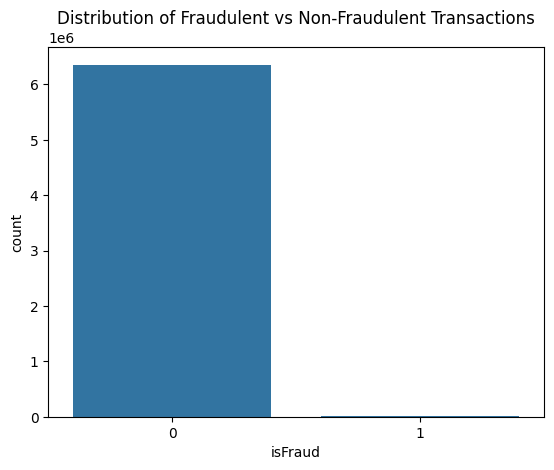

In [21]:
# Countplot for isFraud
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()
